In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
x = df.iloc[:,[3,4]].values

In [10]:
from sklearn.cluster import KMeans 

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

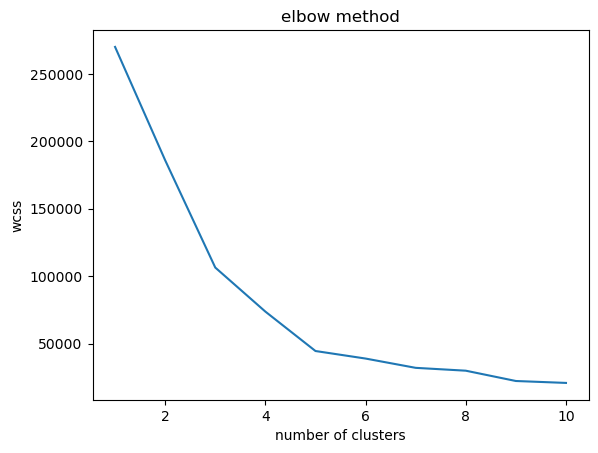

In [17]:
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [19]:
kmeansmodel = KMeans(n_clusters = 5, init='k-means++', random_state = 0)
y_kmeans = kmeansmodel.fit_predict(x)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


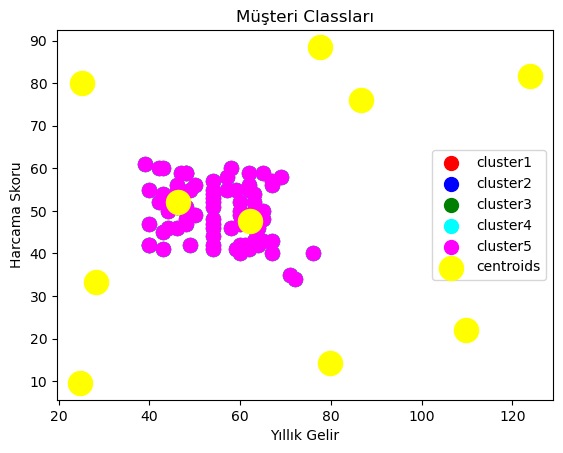

In [29]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red', label='cluster1')
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='blue', label='cluster2')
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='green', label='cluster3')
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='cyan', label='cluster4')
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='magenta', label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c='yellow',label="centroids")
plt.title("Müşteri Classları")
plt.xlabel("Yıllık Gelir")
plt.ylabel("Harcama Skoru")
plt.legend()
plt.show()